### Imports

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from collections import Counter


from google.colab import drive
drive.mount('/content/gdrive')

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from keras.layers import Embedding
from keras.layers import Dense,LSTM
from keras import Input
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation,Reshape
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
import keras
from keras.models import load_model, Model
from keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector
from keras.initializers import glorot_uniform
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras import backend as K
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import roc_auc_score
 
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import Callback, EarlyStopping


from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


# 1. EDA(Exploratory Data Analysis)


1.   We check are there Any Missing  Values in DataFrame 
2.   Suffle the Dataframe -Rows
 


In [0]:
# load the dataset from google drive
musk_df = pd.read_csv('/content/gdrive/My Drive/credicxo/musk_csv.csv')

In [3]:
musk_df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [0]:
# shuffle the dataframe
from sklearn.utils import shuffle
musk_df = shuffle(musk_df)

### Check for missing Values in the dataframe

In [5]:
musk_df.isnull().any()

ID                   False
molecule_name        False
conformation_name    False
f1                   False
f2                   False
                     ...  
f163                 False
f164                 False
f165                 False
f166                 False
class                False
Length: 170, dtype: bool

In [6]:
if (True in list(musk_df.isnull().any())):
  print('Three are few missing Values')
else:
  print('There are No missing Values in the Dataframe')
# there are no missing Values
# False implies there are no missing values

There are No missing Values in the Dataframe


# 2. Uni-Variate Analysis



1.   (2.1)-How many points are present and Is the dataset Balanced or Imbalance Dataset.
2.   (2.2)-Checking How many categories are present in the molecule_name(categorical Variable)
3.   (2.3)-Checking the Distribution of Numerical features to detect Outliers using Box-Plot and PDF-curve's



In [7]:
musk_df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
1232,1233,NON-MUSK-192,192_1+35,114,64,-144,-77,-117,11,56,-164,-40,-21,-295,-113,-67,-276,-284,-303,52,-155,-98,-185,-29,-22,2,105,111,-34,48,-88,25,68,-114,157,-32,11,-127,208,-175,...,56,14,-187,25,-138,-76,-128,-222,-94,52,-71,-18,-33,-26,5,49,16,-178,-102,-119,-56,-51,53,-63,-122,-113,82,180,151,-240,-82,-137,33,253,291,144,-57,-117,62,0
2796,2797,NON-MUSK-252,252_3+133,44,86,15,-77,-117,-131,-163,57,-229,79,-9,-81,46,-66,-100,-52,-213,-45,-73,-37,-159,-180,-219,284,234,-222,-160,-157,-117,38,-117,-35,-21,52,-157,151,-175,...,21,80,-187,-85,-102,-101,-64,-32,-37,-170,-126,-222,-175,-183,-96,-150,-166,-178,-82,-117,24,65,-143,-104,-125,-112,52,2,54,-233,80,-142,9,143,121,162,-66,-148,-12,0
2213,2214,NON-MUSK-251,251_2+45,45,-198,-123,-7,-102,-38,-50,31,21,-141,-54,-119,-68,-91,-75,-271,87,-91,-90,-74,-65,-47,-78,-60,-95,-104,-136,-157,14,-148,-116,-104,-11,-240,64,115,136,...,-198,-148,112,5,79,-62,-97,-94,52,152,21,-98,-29,-59,82,35,66,-178,-105,-119,-140,-182,-83,-6,63,4,-168,-40,-195,-230,-273,-209,-28,152,122,205,-73,-192,2,0
3846,3847,NON-MUSK-326,326_2+22,20,-193,-102,32,-117,-53,214,98,-30,-97,-35,-43,-34,-127,-98,-285,49,-56,4,-46,-70,105,21,-47,-96,6,69,-110,-3,-136,-116,-5,62,-203,76,53,-175,...,-167,-83,-8,51,106,-77,-84,-92,-81,18,-108,5,-54,-38,101,209,140,-178,-102,-100,-9,-76,127,123,-12,55,-169,-19,-187,-234,-220,-206,-132,-95,-15,137,-59,-120,29,0
2706,2707,NON-MUSK-252,252_2+52,53,-98,4,-112,-117,29,-157,67,-237,57,-83,-122,40,-74,22,-248,-176,-80,-47,213,-222,-180,-212,-60,186,-205,-149,-153,-79,256,-103,137,-121,100,-122,75,-145,...,212,12,-185,42,2,-170,-107,-51,89,46,59,-205,-98,-147,56,-83,-99,-178,-104,-114,13,-59,-18,-99,-123,-113,-47,121,-9,32,76,73,-30,-18,101,172,-44,-115,119,0


In [8]:
musk_df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

molecule_name is a categorical feature<br>conformation_name is a Unique ID which is given to each and Every Compound(No.of.conformation_name = No.of.compunds)<br>conformation_name is a categorical Variable but can be Ignored<br>f1 to f166 are Numerical Features <br>class is output which says whether compound is MUSK (or) NOn-Musk 

### 2.1-pie-chart describing how many organic compounds are musk and non-musk based on their features

Number of Musk Compounds  1017 , ( 15.413761745983631 %)
Number of Non-Musk compunds  5581 , ( 84.58623825401637 %)


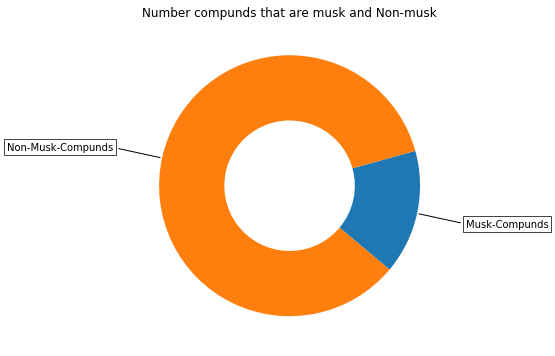

In [9]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = musk_df['class'].value_counts()
print("Number of Musk Compounds ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of Non-Musk compunds ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Musk-Compunds", "Non-Musk-Compunds"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Number compunds that are musk and Non-musk")

plt.show()

dataset is Imbalanced 

### 2.2- Univariate Feature Analysis of Molecular_name(categorical feature)

In [0]:
from collections import Counter
my_counter = Counter()
# counts how many times a particular molecule(X) occurs in many compounds
for word in musk_df['molecule_name'].values:
    my_counter.update(word.split())

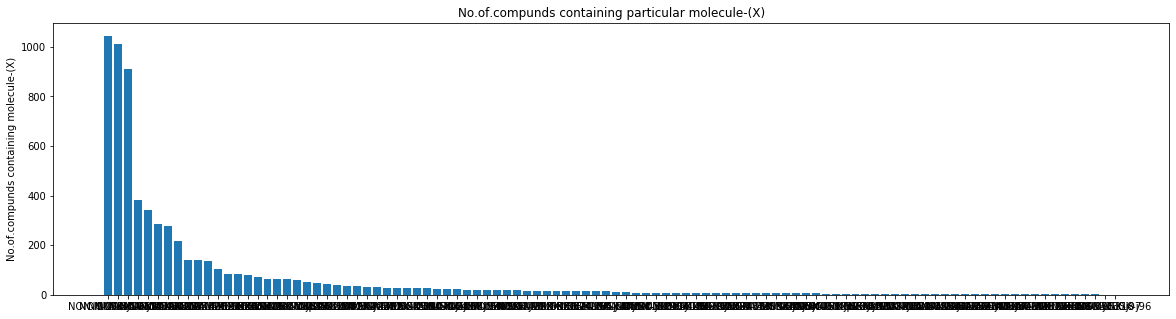

In [50]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
molecule_dict = dict(my_counter)
sorted_molecule_dict = dict(sorted(molecule_dict.items(), key=lambda kv: kv[1],reverse=True))


ind = np.arange(len(sorted_molecule_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_molecule_dict.values()))

plt.ylabel('No.of.compunds containing molecule-(X)')
plt.title('No.of.compunds containing particular molecule-(X)')
plt.xticks(ind, list(sorted_molecule_dict.keys()))
plt.show()

we see a bar graph saying which molecule's are frequently present in the Compund<br>Which Molecule's are rarely present in the compound<br>
NON-MUSK-j146  molecule occurs in most no.of.compound's<br>NON-MUSK-j96  molecule occurs in least no.of.compound's

In [12]:
for i, j in sorted_molecule_dict.items():
    print("{:20} :{:10}".format(i,j))

NON-MUSK-j146        :      1044
NON-MUSK-252         :      1010
NON-MUSK-j147        :       911
NON-MUSK-f146        :       383
NON-MUSK-288         :       344
NON-MUSK-192         :       286
NON-MUSK-197         :       277
MUSK-217             :       215
NON-MUSK-326         :       141
NON-MUSK-251         :       140
NON-MUSK-216         :       135
NON-MUSK-233         :       104
NON-MUSK-270         :        83
MUSK-240             :        82
MUSK-213             :        78
MUSK-215             :        73
MUSK-287             :        64
NON-MUSK-f209        :        63
NON-MUSK-jp13        :        63
NON-MUSK-286         :        59
NON-MUSK-220         :        53
NON-MUSK-207         :        48
MUSK-f158            :        43
NON-MUSK-244         :        40
MUSK-f152            :        36
NON-MUSK-232         :        34
MUSK-jf67            :        32
MUSK-212             :        31
NON-MUSK-249         :        29
NON-MUSK-289         :        29
MUSK-256  

### 2.3-Visualizing Numerical Features using Box-Plot and thier respective Distribution

In [0]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
def plot_numerical_feature(X,feature):
  musk_feature = X[X['class']==1][feature]
  musk_feature = musk_feature.values

  non_musk_feature = X[X['class']==0][feature]
  non_musk_feature = non_musk_feature.values

  plt.figure(1)
  plt.boxplot([musk_feature, non_musk_feature])
  plt.title('BOX-PLOT of numerical feature of MUSK-compound & NON_MUSK-compound')
  plt.xticks([1,2],('MUSK compounds','Non-MUSK compounds'))
  plt.ylabel('range of numerical feature of MUSK-compound & NON_MUSK-compound')
  plt.grid()


  plt.figure(2)
  sns.distplot(musk_feature, hist=False, label="MUSK compounds")
  sns.distplot(non_musk_feature, hist=False, label="Non-MUSK compounds")
  plt.title('PDF of numerical feature of MUSK-compound & NON_MUSK-compound')
  plt.xlabel('range of numerical feature of MUSK-compound & NON_MUSK-compound')
  plt.legend()
  plt.show()

Visualising the Box-Plot and PDF-Curve for MUSK and Non-MUSK compounds with that particular feature <br>Hlp's us in identifying of  outlier's in that numerical_feature and Inter-Quantile Range<br>Visualising the PDF of that particular numerical_feature to check whether it follows any Distribution 

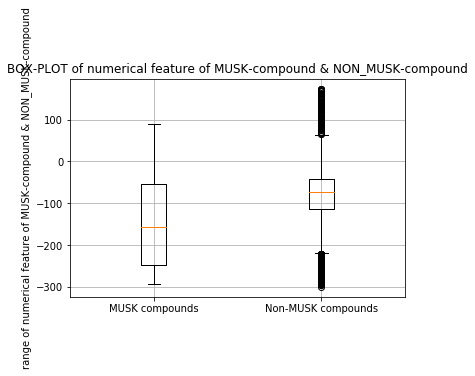

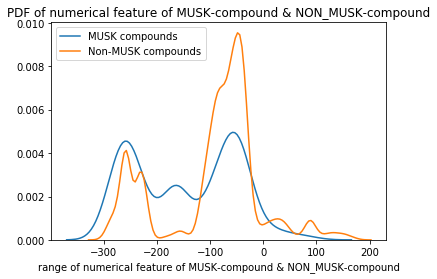

In [56]:
# check the box-plot and PDf curve of any numerical-feature
plot_numerical_feature(musk_df,musk_df.columns[105])

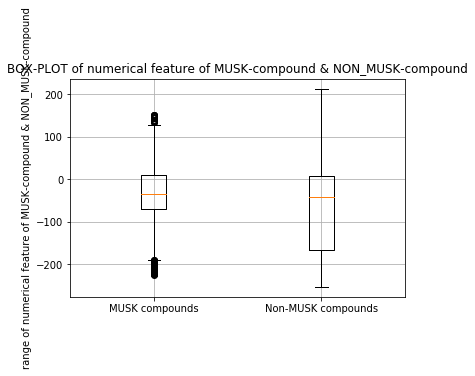

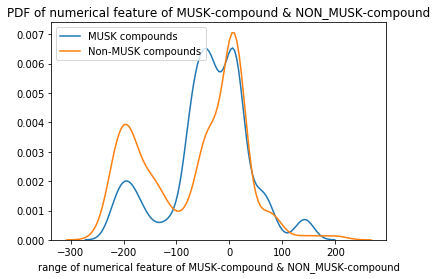

In [55]:
# check the box-plot and PDf curve of any numerical-feature
plot_numerical_feature(musk_df,musk_df.columns[25])

# 3. MULTI-COLLINEARITY

Multi-Collinearity needs to be removed which causes Overfitting<br> We calculate wahts is the co-variance between all numerical features <br>
If two features have co-variance(>96) greater than a certain Threshold, we assume theey are similar and one of them should be removed<br>Multi-Collinearity affects weight's of feature's and feature-Importance

In [15]:
df_numerical = musk_df.drop(['ID','molecule_name','conformation_name','class'],axis=1)
df_numerical.shape
# only consists of Numerical Features 
# we drop categorical and other features

(6598, 166)

### function to drops the numerical features(columns) which causes Multi-Collinearity based on Threshold

In [0]:
def remove_multicollinearity(X,threshold):  
  corr_matrix = X.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find features with correlation greater than threshold
  to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

  # Drop features 
  X_not_collinear = X.drop(to_drop, axis=1)
  return X_not_collinear

In [0]:
# change the Threshold to check the How much Data are we loosing
musk_df_notcollinear = remove_multicollinearity(df_numerical,0.96)

In [18]:
# check the No.of.features before and after checking Multicollinearity
musk_df_notcollinear.shape,df_numerical.shape

((6598, 146), (6598, 166))

If two features are collinear drop any one of the feature <br>Threshold=0.96 says that Two features have 96% similar <br>Having Collinear features results in Overfitting and affects the feature Importance of Model<br>Multi-Collinearity also have affect on weight-vectors of feature's<br>
so,we are removing 20 numerical features which cause Multicollinearity<br>Please change the Threshold and check 

# 4. DATASET = Categorical features + Numerical features (not collinear)

Now, Dataset should consists of Numerical features which are not Collinear and also Categorical Features

In [0]:
dataset = pd.DataFrame(musk_df_notcollinear)

In [0]:
dataset['class'] = musk_df['class']
dataset['molecule_name'] = musk_df['molecule_name']

In [21]:
dataset.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f125,f126,f127,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f144,f145,f146,f147,f148,f149,f150,f151,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class,molecule_name
1232,114,64,-144,-77,-117,11,56,-164,-40,-21,-295,-113,-67,-276,-284,-303,52,-155,-98,-185,-29,-22,2,105,111,-34,48,-88,25,68,-114,157,-32,11,-127,208,-175,3,-128,39,...,97,5,41,14,-187,25,-138,-76,-128,-222,-94,52,-71,-18,-33,-26,5,16,-178,-102,-119,-56,-51,53,-63,82,180,151,-240,-82,-137,33,253,291,144,-57,-117,62,0,NON-MUSK-192
2796,44,86,15,-77,-117,-131,-163,57,-229,79,-9,-81,46,-66,-100,-52,-213,-45,-73,-37,-159,-180,-219,284,234,-222,-160,-157,-117,38,-117,-35,-21,52,-157,151,-175,-118,-22,-108,...,-37,58,79,80,-187,-85,-102,-101,-64,-32,-37,-170,-126,-222,-175,-183,-96,-166,-178,-82,-117,24,65,-143,-104,52,2,54,-233,80,-142,9,143,121,162,-66,-148,-12,0,NON-MUSK-252
2213,45,-198,-123,-7,-102,-38,-50,31,21,-141,-54,-119,-68,-91,-75,-271,87,-91,-90,-74,-65,-47,-78,-60,-95,-104,-136,-157,14,-148,-116,-104,-11,-240,64,115,136,127,-82,17,...,-126,65,-168,-148,112,5,79,-62,-97,-94,52,152,21,-98,-29,-59,82,66,-178,-105,-119,-140,-182,-83,-6,-168,-40,-195,-230,-273,-209,-28,152,122,205,-73,-192,2,0,NON-MUSK-251
3846,20,-193,-102,32,-117,-53,214,98,-30,-97,-35,-43,-34,-127,-98,-285,49,-56,4,-46,-70,105,21,-47,-96,6,69,-110,-3,-136,-116,-5,62,-203,76,53,-175,22,-144,134,...,-72,25,-110,-83,-8,51,106,-77,-84,-92,-81,18,-108,5,-54,-38,101,140,-178,-102,-100,-9,-76,127,123,-169,-19,-187,-234,-220,-206,-132,-95,-15,137,-59,-120,29,0,NON-MUSK-326
2706,53,-98,4,-112,-117,29,-157,67,-237,57,-83,-122,40,-74,22,-248,-176,-80,-47,213,-222,-180,-212,-60,186,-205,-149,-153,-79,256,-103,137,-121,100,-122,75,-145,64,-27,35,...,123,68,91,12,-185,42,2,-170,-107,-51,89,46,59,-205,-98,-147,56,-99,-178,-104,-114,13,-59,-18,-99,-47,121,-9,32,76,73,-30,-18,101,172,-44,-115,119,0,NON-MUSK-252


In [22]:
dataset.shape

(6598, 148)

# 5. MODEL





1.   (5.1)- train and test splitting the dataset using (80,20)-ratio
2.   (5.2)-
3.   (5.3)- Creating a Model for Categorical variable(molecule_name) after padding the categorical_variable
4.   (5.4)- Normalization of Numerical features
5.   (5.5)- Model for Numerical features
6.   (5.6)- Concatenate Both Model's and Train the Model





### 5.1-Train and Test Splitting(80-20)

splitting the dataset into training-data and Test-data

In [23]:
80 * (6598/100),20 * (6598/100)

(5278.400000000001, 1319.6000000000001)

In [0]:
musk_train = dataset[:5275]

In [0]:
musk_test = dataset[5275:]

In [0]:
musk_train = musk_train.reset_index(drop=True)
musk_test = musk_test.reset_index(drop=True)

### 5.2- Padding of molecule_name(categorical_variable- CAT2VEC

We could represent the categorical_variable in form of 1.One-hot-Encoding 2.Dense -Embedding<br>I am going to use Dense-embedding which says Intialize each category in categorical_variable with random vectors(n-dim) <br> training and  update the parameters <br>we arrive at solution such that each category in categorical_variable is defined as vector(v) which represent's its dependency on output <br>we are learning vectors-CAT2VEC of each category after Initialising them Randomly <br>
Please check fast.ai for more details regarding CAT2VEC

In [27]:
# total no.of. unique-molecule'spresent in the dataset
musk_molecule_name = dataset['molecule_name']
len(set(musk_molecule_name))

102

102 unique molecules are present in all the organic compounds

#### padding of molecule's

Each molecule is padded, which means each molecule is represented with an Index assigned to it<br>The random-vector of each molecule is present in the Embedding's <br>The Vector(Embedding) is accessed using the Index assigned to the each category<br>
V1-vector(Embedding) of molecule(X) is accessed using Index assigned to molecule(X)

In [0]:
z = musk_molecule_name.value_counts()
z_index = list(z.index)

indices = []

for j in range(0,len(z_index)):
  index_list = []
  for i in range(0,len(musk_molecule_name)):
    
    if(dataset['molecule_name'][i] == z_index[j]):
      index_list.append(i)
  indices.append(index_list)    
  
  
for i in range(0,len(z_index)):
  
  dataset['molecule_name'][indices[i]] = i+1

In [0]:
musk_molecule_input = dataset['molecule_name'][:len(musk_molecule_name)]
musk_molecule_input = [[i] for i in list(musk_molecule_input)]

musk_molecule_padded also contains Index of respective molecule

In [0]:
musk_molecule_padded = np.array(musk_molecule_input)

In [31]:
musk_molecule_padded

array([[ 6],
       [ 2],
       [10],
       ...,
       [78],
       [ 8],
       [ 1]])

Each category of molecule is represented as Index and this Index is used in Embedding to access respective-vector of its category 

### 5.3-Model of Categorical Variable

In [32]:
# Input of catgeorical variable(index is represented in dim-1)
input_layer_molecule = Input(shape=(1,))
# input_length = which is Index
# output_dim = vector of each-category is represented in 2-dim Vector(Embedding's)
# input_dim = Total No.of.Unique Categories present in the Categorical-Variable
embedding_molecule = Embedding(input_dim=102+1,output_dim= 2, input_length=1)(input_layer_molecule)
# Flatten- Convert 3-dim output into 2-D output
flatten_molecule = Flatten()(embedding_molecule)

flatten_molecule contains vector representation of each Molecule present in the Categorical Variable

### 5.4-Dense Layers using Numerical data Only

In [0]:
# removing categorical data and storing only Numerical data
musk_numerical_train = musk_train.drop(['class','molecule_name'],axis=1)
musk_numerical_test = musk_test.drop(['class','molecule_name'],axis=1)

In [34]:
musk_train.shape,musk_test.shape

((5275, 148), (1323, 148))

#### Normalisation of Numerical features 

Normalisation needs to be done to Input passing into Dense-Layer<br>Because  as we use 'relu' activation the Input gets Neglected if input<0

In [0]:
from scipy.sparse import hstack
from sklearn import preprocessing

min_max_scaler= preprocessing.MinMaxScaler()
musk_numerical_train = min_max_scaler.fit_transform(musk_numerical_train)
musk_numerical_test = min_max_scaler.transform(musk_numerical_test)

### 5.5-MODEL of Numerical-Features

In [0]:
numerical_input = Input(shape=(musk_numerical_train.shape[1], ), dtype='float32')
numerical_dense = Dense(64, activation='relu')(numerical_input)

numerical_data is represented in  64-dim vector

### 5.6-Concatenate MODEL's(Categorical-Model + Numerical Model)

In [0]:
# concatenate the output's of their respective model's

cat_num_concatenate = keras.layers.concatenate([flatten_molecule,
                                          numerical_dense],axis=-1)

In [38]:
# Add few Dense Layer's at the end
Dense_1 = Dense(32, activation='relu')(cat_num_concatenate)
dropout_1 = Dropout(0.25)(Dense_1)
Dense_2 = Dense(16, activation='relu')(dropout_1)
dropout_2 = Dropout(0.5)(Dense_2)
Dense_3 = Dense(8, activation='relu')(dropout_2)
predictions = Dense(2, activation='sigmoid')(Dense_3)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Input's and output's of Model's

In [0]:
input_all = [input_layer_molecule,numerical_input]
model_1 = Model(inputs= input_all, outputs = predictions)   

In [40]:
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 2)         206         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 146)          0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2)            0           embedding_1[0][0]                
____________________________________________________________________________________________

#### Image Describing the Model

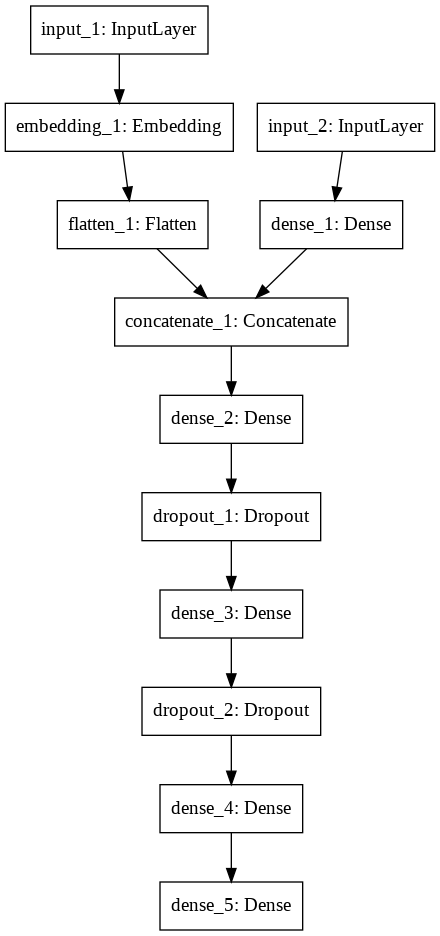

In [41]:
from keras.utils import plot_model
plot_model(model_1, to_file='model.png')

In [42]:
# compile the model
opt = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Creating a CheckPoint for Model

In [0]:
# creating a model checkpoint which monitirs the training Loss 
from keras.callbacks import ModelCheckpoint
# Model stores the Parameters of Best Model which has low training-Loss
filepath = "/content/gdrive/My Drive/credicxo/weights_full_train-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [43]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

y_encoded = onehot_encoder.fit_transform(musk_df[['class']]).toarray()
print('outputs_encoded.shape after One Hot Encode', y_encoded.shape)

outputs_encoded.shape after One Hot Encode (6598, 2)


### 5.7 Training the Model using Training-Data

In [0]:
history = model_1.fit([musk_molecule_padded[:5275],musk_numerical_train],y_encoded[:5275],
            validation_data=([musk_molecule_padded[5275:],musk_numerical_test],y_encoded[5275:]),
            epochs=10,
            batch_size=64,
            callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5275 samples, validate on 1323 samples
Epoch 1/10





5275/5275 [==============================] - 1s 114us/step - loss: 0.4557 - acc: 0.8436 - val_loss: 0.3852 - val_acc: 0.8450

Epoch 00001: val_loss improved from inf to 0.38515, saving model to /content/gdrive/My Drive/credicxo/weights_full_train-01-0.85.hdf5
Epoch 2/10
5275/5275 [==============================] - 0s 34us/step - loss: 0.3433 - acc: 0.8461 - val_loss: 0.2463 - val_acc: 0.8450

Epoch 00002: val_loss improved from 0.38515 to 0.24632, saving model to /content/gdrive/My Drive/credicxo/weights_full_train-02-0.85.hdf5
Epoch 3/10
5275/5275 [==============================] - 0s 38us/step - loss: 0.2203 - acc: 0.8709 - val_loss: 0.1493 - val_acc: 0.9660

Epoch 00003: val_loss improved from 0.24632 to 0.14932, saving model to /content/gdrive/My Drive/credicxo/weights_full_train-03-0.97.hdf5
Epoch 4/10
5275/5275 [=========

# 6. MODEL-Plot's and Report

### 6.1-lot's Describing the Train,test-Accuracy of Model and Train,test-Loss of Model while Training

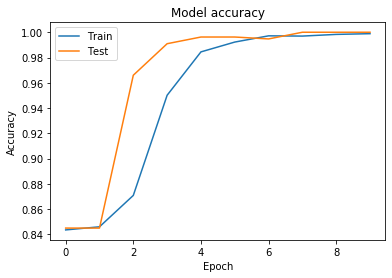

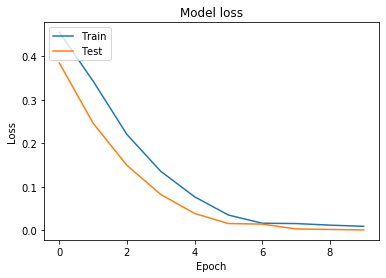

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 6.2-Train-Confusion Matrix

In [0]:
y_predicted_train = model_1.predict([musk_molecule_padded[:5275],musk_numerical_train])

In [0]:
y_predicted_label= [np.argmax(y_predicted_train[i]) for i in range(y_predicted_train.shape[0])]

Train confusion matrix
AxesSubplot(0.125,0.125;0.62x0.755)


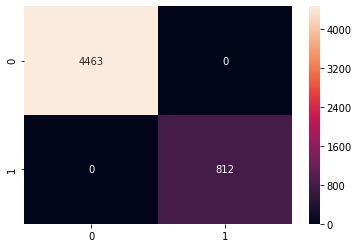

In [0]:
print("Train confusion matrix")
cm=confusion_matrix(musk_df['class'][:5275], y_predicted_label)
print(sns.heatmap(cm,annot=True,fmt='.5g'))

In [0]:
from sklearn.metrics import classification_report

print(classification_report(musk_df['class'][:5275], y_predicted_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4463
           1       1.00      1.00      1.00       812

    accuracy                           1.00      5275
   macro avg       1.00      1.00      1.00      5275
weighted avg       1.00      1.00      1.00      5275



### 6.3-TEST-Confusion Matrix

In [0]:
y_predicted_test = model_1.predict([musk_molecule_padded[5275:],musk_numerical_test])

In [0]:
y_predicted_label= [np.argmax(y_predicted_test[i]) for i in range(y_predicted_test.shape[0])]

TEST confusion matrix
AxesSubplot(0.125,0.125;0.62x0.755)


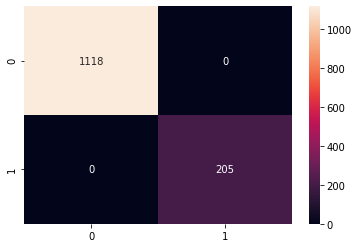

In [0]:
print("TEST confusion matrix")
cm=confusion_matrix(musk_df['class'][5275:], y_predicted_label)
print(sns.heatmap(cm,annot=True,fmt='.5g'))

In [0]:
from sklearn.metrics import classification_report

print(classification_report(musk_df['class'][5275:], y_predicted_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00       205

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323

